# Ames Housing Data EDA

This project aims to predict housing prices in Ames, Iowa based on the Ames Iowa Housing Dataset from the Ames City Assessor's Office, made available by Dean De Cock of Truman University in 2011. Professor De Cock's original paper can be found [here.](http://jse.amstat.org/v19n3/decock.pdf)

Presentation Slides for this project can be found [here.](https://www.beautiful.ai/player/-N4J5UYshyuRtwl5G4I7)

This notebook includes python code for data extraction and cleaning. Preprocessing and feature engineering code as well as Model Fitting and Analysis code can be found in the Feature Engineering and Modeling notebooks, respectively.

### Sections and steps

- <a href="#IMP">1. Reading in Data</a><br>
- <a href="#DQ">2. Data Quality</a><br>
    - <a href="#RD">2.1 Removing Duplicates</a><br>
    - <a href="#MD">2.2 Handling Missing Data</a><br>
    - <a href="#OT">2.3 Handling Outliers</a><br>
    - <a href="#SP">2.4 Summary of Data Cleaning </a>
- <a href="#EDA">3. Exploratory Data Analysis</a><br>
    - <a href="#FP">3.1 First Pass - Visualization</a><br>
    - <a href="#FE">3.2 First Pass - Feature Engineering</a><br>
    - <a href="#SPV">3.3 Second Pass - Visualization </a>
    - <a href="#SEDA">3.4 Summary of EDA Findings </a>
- <a href="#EXP">4. Exporting Cleaned Dataset</a><br>

<p><a name="IMP"></a></p>

## 1. Importing Packages, Reading in Data

In [1]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

#helper module
from helper_module import *

#setting options to view dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#warnings
import warnings
warnings.filterwarnings("ignore")

#helper module functionality
%load_ext autoreload
%autoreload 2

In [2]:
#testing to make sure helper module loaded, that matplotlib is updated
test_helpermod()

'Yes! Module loaded successfully!'

In [6]:
#this is to check the version of matplot lib to figure out labeling bar axes

#import matplotlib
#print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.3.4


In [4]:
#reading in train data
train = pd.read_csv('./data/raw/Ames_HousePrice.csv')
#dropping two columns
train.drop(['Unnamed: 0'], axis = 1, inplace = True)
print(f"Read in Ames Housing Train Data - Shape: {train.shape}")

Read in Ames Housing Train Data - Shape: (2580, 81)


In [5]:
train.head(2)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal


<p><a name="DQ"></a></p>

## 2. Data Quality

In [7]:
print('The raw number of features is ', train.shape[1])
print('The raw number of observations is ', train.shape[0])
print('The data types are:', train.dtypes.unique())

The raw number of features is  81
The raw number of observations is  2580
The data types are: [dtype('int64') dtype('O') dtype('float64')]


In [8]:
#getting a look at column data types
#train.info()

Noticing here categorical values that have numerical dtypes:

        - MSSubClass
        - MoSold
        
As well as ordinal variables that could have numerical dtypes:

        - OverallQual
        - OverallCond

In [9]:
#changing the dtype of these variables to strings
for item in ['MSSubClass', 'MoSold', 'OverallQual', 'OverallCond']:
    train[item] = train[item].astype(str)

In [10]:
#selecting just categorical variables in the dataframe and creating a list
cat_var = train.select_dtypes('O').columns.tolist()

#selecting just continuous variables in the dataframe and creating a list
num_var = train.select_dtypes('number').columns.tolist()
#PID shouldn't be included in the numerical variables list
num_var.remove('PID')

print('The number of categorical features is' , len(cat_var))
print('The number of numerical features is', len(num_var))
print('The combined numerical and categorical features are', train.shape[1]-1)

The number of categorical features is 47
The number of numerical features is 33
The combined numerical and categorical features are 80


This is a lot of features for a linear model!
(with dummification, the number of features will expand significantly!)

A goal of this preliminary EDA will be to flag features that can be dropped or combined to reduce the number of features that will go into preprocessing and modeling steps.

<p><a name="RD"></a></p>

### 2.1 Removing Duplicates

Reading the original paper that Professor De Cock released with the dataset, he notes that properties sold multiple times in this time frame were only included once (the most recent sale).

There were no duplicates in the original dataset, but since this dataset is a subset, and has been preprocessed, we will still check for duplicates to be thorough.

In [11]:
train.PID.is_unique

False

In [12]:
#finding the duplicate observations!
train[train.PID.duplicated()]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1817,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1940,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Mn,BLQ,602.0,Unf,0.0,299.0,901.0,GasA,TA,Y,SBrkr,1125,592,0,0.0,0.0,1,1,2,1,TA,7,Typ,1,Gd,Attchd,1940.0,Unf,1.0,410.0,TA,TA,Y,0,0,0,0,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal


In [13]:
#verifyng that the observations are the same
train[train['PID'] == 909276070]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1816,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1940,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Mn,BLQ,602.0,Unf,0.0,299.0,901.0,GasA,TA,Y,SBrkr,1125,592,0,0.0,0.0,1,1,2,1,TA,7,Typ,1,Gd,Attchd,1940.0,Unf,1.0,410.0,TA,TA,Y,0,0,0,0,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal
1817,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1940,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Mn,BLQ,602.0,Unf,0.0,299.0,901.0,GasA,TA,Y,SBrkr,1125,592,0,0.0,0.0,1,1,2,1,TA,7,Typ,1,Gd,Attchd,1940.0,Unf,1.0,410.0,TA,TA,Y,0,0,0,0,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal


In [14]:
#Dropping the duplicate row
train.drop_duplicates(inplace = True)

<p><a name="MD"></a></p>

### 2.2 Handling Missing Data

We can see that there are several variables missing some observations.

As per the data description, we will replace empty values that have meanings with the appropriate meaning. Eg. For PoolQC, NA actually means there is no pool on the property

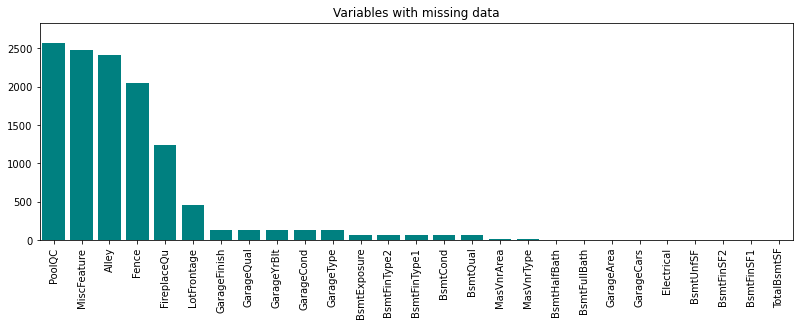

,Number,Percent
PoolQC,2570,99.651028
MiscFeature,2482,96.238852
Alley,2411,93.485847
Fence,2054,79.643273
FireplaceQu,1241,48.119426
LotFrontage,462,17.913920
GarageFinish,129,5.001939
GarageQual,129,5.001939
GarageYrBlt,129,5.001939
GarageCond,129,5.001939


In [15]:
#using helper function to show us the columns with missing data
help_missing(train, title = 'Variables with missing data')
#plt.savefig('./figures/missing_values.png', bbox_inches='tight')

In [16]:
# Replacing missing values with appropriate meaning based on data description
train.fillna(value={'Alley' : 'NoAlley',
                   'BsmtQual': 'NoBasement',
                   'BsmtCond': 'NoBasement',
                   'BsmtExposure': 'NoBasement',
                   'BsmtFinType1': 'NoBasement',
                   'BsmtFinType2': 'NoBasement',
                   'FireplaceQu' : 'NoFireplace',
                   'GarageType': 'NoGarage',
                   'GarageFinish': 'NoGarage',
                   'GarageQual': 'NoGarage',
                    'GarageCond' : 'NoGarage',
                   'PoolQC': 'NoPool',
                   'Fence': 'NoFence',
                   'MiscFeature': 'NoMisc'},
            inplace = True)

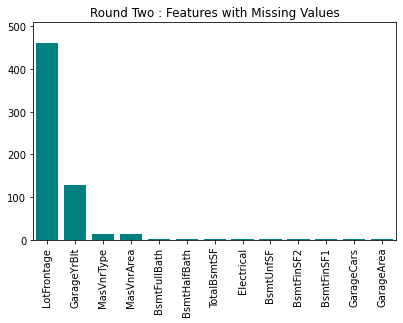

,Number,Percent
LotFrontage,462,17.913920
GarageYrBlt,129,5.001939
MasVnrType,14,0.542846
MasVnrArea,14,0.542846
BsmtFullBath,2,0.077549
BsmtHalfBath,2,0.077549
TotalBsmtSF,1,0.038775
Electrical,1,0.038775
BsmtUnfSF,1,0.038775
BsmtFinSF2,1,0.038775


In [17]:
help_missing(train, 'Round Two : Features with Missing Values')

First looking at LotFrontage

In [18]:
#Looking at LotFrontage
#trying to see if these homes maybe don't have any street
#maybe high density aka condos or apartments?
train[train['LotFrontage'].isnull()]['MSZoning'].value_counts()

RL         402
RM          35
FV          19
RH           4
I (all)      1
C (all)      1
Name: MSZoning, dtype: int64

Noticing that two observations are zoned for industrial and commerical areas. We will look into dropping abnormal observations when we take a first pass look at the independent variables

In [19]:
#trying again, with type of dwelling
train[train['LotFrontage'].isnull()]['MSSubClass'].value_counts()

20     171
60     128
120     33
80      30
50      24
90      17
85      15
160     13
30      12
70      10
190      4
75       2
180      1
150      1
40       1
Name: MSSubClass, dtype: int64

In [20]:
#trying again with lot configuration
train[train['LotFrontage'].isnull()]['LotConfig'].value_counts()

Inside     261
Corner      95
CulDSac     83
FR2         20
FR3          3
Name: LotConfig, dtype: int64

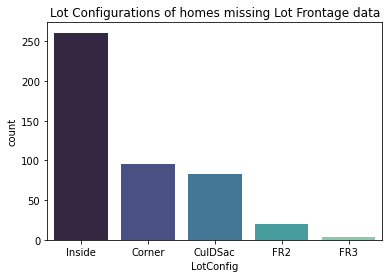

In [21]:
#visualizing with a count plot
sns.countplot(x=train[train['LotFrontage'].isnull()]['LotConfig'],
              data = train[train['LotFrontage'].isnull()],
             order = ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'],
             palette = "mako").set(title='Lot Configurations of homes missing Lot Frontage data');

In [22]:
#comparing this with value counts of lot config across dataset
print(train.LotConfig.value_counts())

Inside     1885
Corner      439
CulDSac     164
FR2          78
FR3          13
Name: LotConfig, dtype: int64


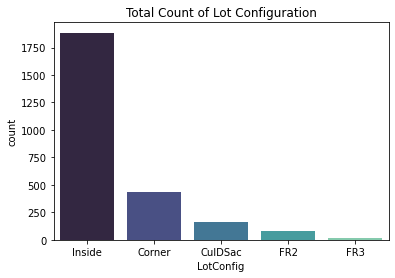

In [23]:
#visualizing with a count plot
sns.countplot(x=train['LotConfig'],
              data = train,
             order = ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'],
             palette = "mako").set(title='Total Count of Lot Configuration');

More observations that are CulDSacs are missing LotFrontage data. 

We could impute the missing values of Lot Frontage as the mean or median of the Lot Configuration. It would make sense that different types of Lot configuration might have more or less lot frontage.

Let's take a look at the distributions of Lot Frontage based on Lot Configuration

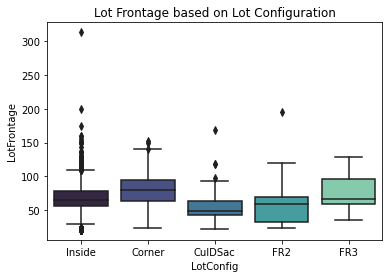

In [24]:
#boxplot of Lot Frontage based on Lot Configuration
sns.boxplot(x='LotConfig',
            y = 'LotFrontage',
            order = ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'],
            data = train,
           palette = "mako").set(title='Lot Frontage based on Lot Configuration');

Immediately noticing some outliers in Lot Frontage, we will deal with those next.

The box plot shows that the amount of Lot Frontage of each property does change based on Lot Configuration. To be sure, let's run an ANOVA.

In [25]:
#Running an ANOVA to make sure the group means are different
model = ols('LotFrontage ~ C(LotConfig)', data = train).fit()
anova_tbl = sm.stats.anova_lm(model, typ=2)
effect_size = anova_tbl['sum_sq'][0]/(anova_tbl['sum_sq'][0]+anova_tbl['sum_sq'][1])
        
p_val = round(anova_tbl['PR(>F)'][0], 5)
print('ANOVA p-val and effect size for classes of Lot Config is :', p_val, ' and ', round(effect_size, 5))

ANOVA p-val and effect size for classes of Lot Config is : 0.0  and  0.07362


In [26]:
#imputing median values for missing Lot Config values

print(train['LotFrontage'].mean())
print(train['LotFrontage'].median())

#Noticing that the mean and the median for the entire Lot Frontage series are very close

68.51062824752007
68.0


In [27]:
#imputing median LotFrontage value based on each LotConfig group
count = 0
for (idx, LotConfig) in train[train['LotFrontage'].isnull()].iterrows():
    config = train['LotConfig'][idx]
    dict1 = train.groupby(['LotConfig']).median()[['LotFrontage']].to_dict()
    train['LotFrontage'][idx] = dict1['LotFrontage'][config]
    count += 1
print(count) #expecting 462

462


In [28]:
#testing to see if it worked
train['LotFrontage'].isnull().sum()

0

Now looking at GarageYrBlt

In [29]:
#Looking at Garage Year Built
print(train['GarageYrBlt'].describe())
print('Earliest Garage built was in : ', train['GarageYrBlt'].min())

count    2450.000000
mean     1976.997143
std        24.653507
min      1895.000000
25%      1960.000000
50%      1978.000000
75%      2000.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
Earliest Garage built was in :  1895.0


In [30]:
#Looking at Garage Year Built side by side with Year House was Built
train[['GarageYrBlt', 'YearBuilt']].head(20)

,GarageYrBlt,YearBuilt
0,1939.0,1939
1,1984.0,1984
2,1930.0,1930
3,1940.0,1900
4,2001.0,2001
5,2003.0,2003
6,1974.0,1953
7,2007.0,2007
8,1984.0,1984
9,2005.0,2005


Looks like most houses were built the same year the garage was built. Wondering is this holds true for older houses?

In [31]:
train[['GarageYrBlt', 'YearBuilt']].sort_values('YearBuilt', ascending = True).head(25)

,GarageYrBlt,YearBuilt
469,NaN,1872
2085,NaN,1875
2501,1950.0,1879
607,1900.0,1880
2026,1930.0,1880
1162,2003.0,1880
23,1950.0,1880
514,1937.0,1880
1672,1925.0,1882
2462,1954.0,1885


Older homes seem to have garages built years after the construction of the house. What if these newer garage additions correspond to the year the home was remodeled?

In [32]:
train[['GarageYrBlt', 'YearBuilt', 'YearRemodAdd']].head(10)

,GarageYrBlt,YearBuilt,YearRemodAdd
0,1939.0,1939,1950
1,1984.0,1984,1984
2,1930.0,1930,2007
3,1940.0,1900,2003
4,2001.0,2001,2001
5,2003.0,2003,2003
6,1974.0,1953,1953
7,2007.0,2007,2008
8,1984.0,1984,1984
9,2005.0,2005,2005


Hm, the year of the home remodel doesn't seem like a good proxy for the year the garage might have been built.

In [33]:
train[train['GarageYrBlt'].isnull()].head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
17,909101060,864,67000,30,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1914,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,41.0,Unf,0.0,823.0,864.0,GasA,TA,N,FuseF,864,0,0,1.0,0.0,1,0,2,1,TA,5,Typ,0,NoFireplace,NoGarage,NaN,NoGarage,0.0,0.0,NoGarage,NoGarage,N,0,0,100,0,0,0,NoPool,NoFence,NoMisc,0,9,2008,WD,Normal
22,923228080,1092,98000,160,RM,21.0,1477,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,6,9,1970,2007,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,358.0,Unf,0.0,188.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,0.0,0.0,2,1,3,1,TA,6,Typ,0,NoFireplace,NoGarage,NaN,NoGarage,0.0,0.0,NoGarage,NoGarage,Y,187,0,0,0,0,0,NoPool,NoFence,NoMisc,0,3,2008,WD,Normal
44,535379110,1534,148000,70,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,9,1895,1999,Gable,CompShg,Wd Sdng,HdBoard,None,0.0,TA,Gd,CBlock,Gd,TA,Av,Unf,0.0,Unf,0.0,736.0,736.0,GasA,Ex,Y,SBrkr,751,783,0,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NoFireplace,NoGarage,NaN,NoGarage,0.0,0.0,NoGarage,NoGarage,N,0,112,0,0,0,0,NoPool,NoFence,NoMisc,0,7,2007,WD,Normal
48,902106130,936,109500,30,RM,56.0,4485,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,7,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,BLQ,579.0,Unf,0.0,357.0,936.0,GasA,TA,Y,SBrkr,936,0,0,1.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,NoGarage,NaN,NoGarage,0.0,0.0,NoGarage,NoGarage,P,51,0,135,0,0,0,NoPool,MnPrv,NoMisc,0,5,2010,WD,Normal
50,909176170,2592,150000,90,RL,60.0,10890,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,5,6,1923,1950,Hip,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,371.0,Unf,0.0,925.0,1296.0,Grav,Fa,N,FuseA,1296,1296,0,2.0,0.0,2,0,6,2,TA,12,Min2,0,NoFireplace,NoGarage,NaN,NoGarage,0.0,0.0,NoGarage,NoGarage,Y,0,742,240,0,0,0,NoPool,NoFence,Shed,1512,1,2007,WD,AdjLand


For now, we will impute the null values of GarageYrBlt as the year the house was built.

In [34]:
#imputing Garage year as year house was built for missing values
train['GarageYrBlt'].fillna(train.YearBuilt, inplace=True)

Now looking at MasVnrType and MasVnrArea

In [35]:
#Data description says NA is no MasVnrType
train['MasVnrType'].fillna('None', inplace=True)
#imputing 0 for MasVnrArea
train['MasVnrArea'].fillna(0, inplace=True)

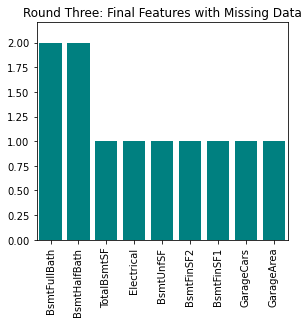

,Number,Percent
BsmtFullBath,2,0.077549
BsmtHalfBath,2,0.077549
TotalBsmtSF,1,0.038775
Electrical,1,0.038775
BsmtUnfSF,1,0.038775
BsmtFinSF2,1,0.038775
BsmtFinSF1,1,0.038775
GarageCars,1,0.038775
GarageArea,1,0.038775


In [36]:
help_missing(train, title = 'Round Three: Final Features with Missing Data')

Looking at the remaining observations with missing values

In [37]:
train[train['BsmtFullBath'].isnull()]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
912,903230120,896,79000,20,RM,99.0,5940,Pave,NoAlley,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NoBasement,NoBasement,NoBasement,NoBasement,NaN,NoBasement,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,NaN,NaN,1,0,2,1,TA,4,Typ,0,NoFireplace,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NoPool,MnPrv,NoMisc,0,4,2008,ConLD,Abnorml
2308,908154080,3820,284700,20,RL,123.0,47007,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NoBasement,NoBasement,NoBasement,NoBasement,0.0,NoBasement,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NoPool,NoFence,NoMisc,0,7,2008,WD,Normal


For both of these observations, there is no basement, so we will impute BsmtFullBath and BsmtHalfBath as 0.

Making a note for later to go over these kinds of things when searching for anomalies - eg, observations with no basement but basement bathrooms listed etc.

In [38]:
train.loc[[912,2308], ['BsmtFullBath', 'BsmtHalfBath']] = 0

In [39]:
#checking
train.loc[[912, 2308]]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
912,903230120,896,79000,20,RM,99.0,5940,Pave,NoAlley,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NoBasement,NoBasement,NoBasement,NoBasement,NaN,NoBasement,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,0.0,0.0,1,0,2,1,TA,4,Typ,0,NoFireplace,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NoPool,MnPrv,NoMisc,0,4,2008,ConLD,Abnorml
2308,908154080,3820,284700,20,RL,123.0,47007,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NoBasement,NoBasement,NoBasement,NoBasement,0.0,NoBasement,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,0.0,0.0,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NoPool,NoFence,NoMisc,0,7,2008,WD,Normal


Checking TotalBsmtSF

In [40]:
train[train['TotalBsmtSF'].isnull()]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
912,903230120,896,79000,20,RM,99.0,5940,Pave,NoAlley,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NoBasement,NoBasement,NoBasement,NoBasement,NaN,NoBasement,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,0.0,0.0,1,0,2,1,TA,4,Typ,0,NoFireplace,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NoPool,MnPrv,NoMisc,0,4,2008,ConLD,Abnorml


This is one of the same observations that also had missing basement bathroom info. It is also missing BsmtUnfSF, BsmtFinSF1, BsmtFinSF2 values. This is because this observation has no basement, we'll impute these numbers as 0.

In [41]:
train.loc[912, ['TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2']] = 0

In [42]:
#Checking
train.loc[[912]]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
912,903230120,896,79000,20,RM,99.0,5940,Pave,NoAlley,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NoBasement,NoBasement,NoBasement,NoBasement,0.0,NoBasement,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,0.0,0.0,1,0,2,1,TA,4,Typ,0,NoFireplace,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NoPool,MnPrv,NoMisc,0,4,2008,ConLD,Abnorml


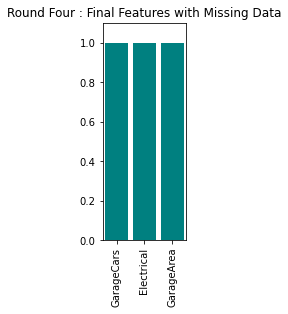

,Number,Percent
GarageCars,1,0.038775
Electrical,1,0.038775
GarageArea,1,0.038775


In [43]:
help_missing(train, title = 'Round Four : Final Features with Missing Data')

Looking at Electrical

In [44]:
train[train['Electrical'].isnull()]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2442,916386080,1394,167500,80,RL,73.0,9735,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754,640,0,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NoFireplace,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NoPool,NoFence,NoMisc,0,5,2008,WD,Normal


In [45]:
#looking at the options
train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', nan], dtype=object)

In [46]:
#Looking at Electrical value counts
train['Electrical'].value_counts()

SBrkr    2364
FuseA     168
FuseF      39
FuseP       7
Name: Electrical, dtype: int64

In [47]:
#going to drop the Electrical observation that is missing data
print(train.shape)
train.drop(2442, axis = 0, inplace = True)
train.shape

(2579, 81)


(2578, 81)

Looking at observations with missing data for Garage Cars and Garage Area

In [48]:
train[train['GarageCars'].isnull()]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
433,910201180,1828,150909,70,RM,50.0,9060,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NoFireplace,Detchd,1923.0,NoGarage,NaN,NaN,NoGarage,NoGarage,Y,174,0,212,0,0,0,NoPool,MnPrv,NoMisc,0,3,2007,WD,Alloca


Missing all info about the Garage Quality/Finish/Size, but DO have a garage type. Dropping this observation as an anomaly.

In [49]:
#going to drop the GarageCars observation that is missing data
print(train.shape)
train.drop(433, axis = 0, inplace = True)
train.shape

(2578, 81)


(2577, 81)

In [50]:
#doublechecking
train.isnull().any()

PID              False
GrLivArea        False
SalePrice        False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir 

<p><a name="OT"></a></p>

### 2.3 Handling Outliers

Creating a dictionary of observations that are outliers for the numerical variables:

In [51]:
ot_dict = {}
for var in num_var:
    z_scores = stats.zscore(train[num_var][[var]])
    outliers = np.where(abs(z_scores)> 4.5)[0].tolist()
    ot_dict[var] = outliers

In [52]:
ot_dict.keys()

dict_keys(['GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold'])

In Professor De Cock's original paper, he recommends removing outliers from GrLivArea. We will look at these first:

In [53]:
train['GrLivArea'].describe()

count    2577.000000
mean     1485.853318
std       488.863636
min       334.000000
25%      1112.000000
50%      1436.000000
75%      1733.000000
max      4676.000000
Name: GrLivArea, dtype: float64

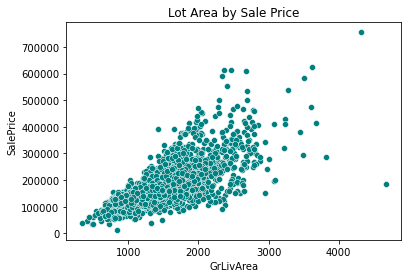

In [54]:
sns.scatterplot(x='GrLivArea', y = 'SalePrice',
                          data=train,
               color = 'teal').set(title='Lot Area by Sale Price');

In [55]:
ot_dict['GrLivArea']

[309, 1006, 2306]

In [56]:
#initializing indicator variable
train['Type'] = 'Normal'

In [57]:
train['Type'][ot_dict['GrLivArea']] = 'Outlier'

In [58]:
#checking
train.Type.value_counts()

Normal     2574
Outlier       3
Name: Type, dtype: int64

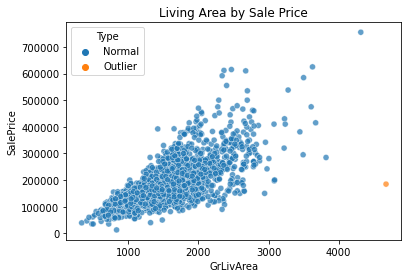

In [61]:
sns.scatterplot(x='GrLivArea',
                y = 'SalePrice',
                hue = 'Type',
                alpha = 0.7,
                data=train,
                color = 'teal').set(title = "Living Area by Sale Price");
plt.savefig('./figures/LivingAreaOutliers.png', bbox_inches='tight', dpi = 300, transparent = True)

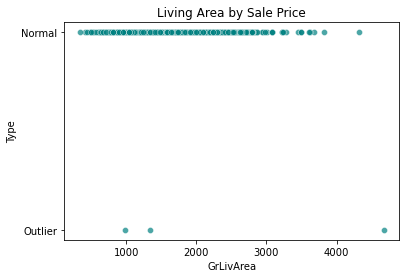

In [62]:
sns.scatterplot(x='GrLivArea',
                y = 'Type',
                alpha = 0.7,
                data=train,
                color = 'teal').set(title = "Living Area by Sale Price");

In [ ]:
#adding the outliers to list of observations to drop
obs_to_drop = ot_dict['GrLivArea']

Taking a deeper look at LotArea

In [ ]:
#Looking at Lot Area Outliers
train['LotArea'].describe()

Creating a scatterplot to see if the outliers from GrLivArea are the same as the outliers for LotArea

In [ ]:
sns.scatterplot(x='LotArea', y = 'SalePrice',
                          data=train,
                hue = 'Type',
               color = 'teal').set(title='Lot Area by Sale Price');

Hm, the outliers for LotArea are different. Let's order the outliers by size of LotArea and examine the four most egeregious ones that have medium sale prices, but extremely large lots.

In [ ]:
train.loc[ot_dict['LotArea']].sort_values('LotArea', ascending = False).head()

Let's mark these four homes as outliers and remove them from our dataset.

In [ ]:
lot_outliers = [355, 249, 195, 104]

In [ ]:
train['Type'][lot_outliers] = 'Outlier'

In [ ]:
#checking
train.Type.value_counts()

In [ ]:
#adding these to our list of observations to drop
obs_to_drop += lot_outliers

Taking a second look at Living Area Outliers

In [ ]:
sns.scatterplot(x='GrLivArea',
                y = 'SalePrice',
                hue = 'Type',
                alpha = 0.5,
                data=train,
                color = 'teal').set(title = "Living Area by Sale Price");
plt.savefig('./figures/Outliers.png', bbox_inches='tight', dpi = 300, transparent = True)

In [ ]:
sns.scatterplot(x='LotArea',
                y = 'SalePrice',
                hue = 'Type',
                data=train,
                color = 'teal').set(title = "Living Area by Sale Price");

In [ ]:
obs_to_drop

In [ ]:
print(train.shape)
print(set(obs_to_drop))
train.drop(obs_to_drop, axis = 0, inplace = True)
print('Dropped ' , len(set(obs_to_drop)), ' observations.')

In [ ]:
train.shape

In [ ]:
#resetting list of observations to be dropped
obs_to_drop = []
#dropping the temporary variable 'Type' from the dataset
train.drop('Type', axis = 1, inplace = True)

Last look at the distributions of GrLivArea and LotArea with outliers removed

In [ ]:
sns.scatterplot(x='GrLivArea',
                y = 'SalePrice',
                data=train,
                color = 'teal').set(title = "Living Area by Sale Price");

In [ ]:
sns.scatterplot(x='LotArea',
                y = 'SalePrice',
                data=train,
                color = 'teal').set(title = "Lot Area by Sale Price");

<p><a name="SP"></a></p>

### 2.4 Summary of Data Cleaning

##### Observations Dropped (9)
   -> 1 duplicate observation dropped
   -> 1 obs missing Electrical data dropped
   -> 1 obs missing Garage are dropped
   -> 
   - Electrical -> 1 obs dropped due to missing data
   - GrLivArea -> 4 outlier obs dropped
   - LotArea -> 4 outlier obs dropped

<p><a name="EDA"></a></p>

## 3. Exploratory Data Analysis

<p><a name="FP"></a></p>

### 3.1 First Pass - Visualization


#### 3.1.1 Dependant Variable - Sale Price

In [ ]:
#descriptive summary of Sale Price
train['SalePrice'].describe()

In [ ]:
#plotting a histogram using seaborn
#histogram
plt.figure(figsize=(12,8))
sns.histplot(train.SalePrice, bins=30, kde=True, color = 'teal');
plt.title("Ames Property Sale Prices")
plt.xlabel("Sale Price ($)")
plt.ylabel("Count and Density")
plt.savefig('./figures/SalesPrice.png', bbox_inches='tight', dpi = 300, transparent = True)

Noticing that the dependent variable looks right skewed, and that there are outliers.
(aka not normally distributed). For linear models, we want the residuals of the model to be normal, so we might need to transform this variable.

In [ ]:
#checking Mean and Median
print('Median: %f' % round(train.SalePrice.median()))
print('Mean: %f' % round(train.SalePrice.mean()))
#checking skewness and kurtosis
print("Skewness: %f" % train.SalePrice.skew())
print("Kurtosis: %f" % train.SalePrice.kurt())

In [ ]:
#looking at potential outliers
sns.boxplot(x = train.SalePrice, color = 'teal').set(title = 'Distribution of Sales Price')
plt.show()

In [ ]:
#finding sale price outliers
spoutliers = train[np.abs(stats.zscore(train.SalePrice)) > 4]
spoutliers.sort_values('SalePrice')

Noticing that there are only expensive property outliers in this dataset.

To ensure that the residuals of a linear model taken will be normal, we will take the log of the Sale Price instead of the Sale Price.

In [ ]:
#adding a column for log sale price
train['log_SalePrice'] = np.log(train['SalePrice'])

In [ ]:
#plotting a histogram using seaborn
#histogram
plt.figure(figsize=(12,8))
sns.histplot(train.log_SalePrice, bins=30, kde=True, color = 'teal')
plt.title("Log of Ames Property Sale Prices")
plt.xlabel("Sale Price ($)")
plt.ylabel("Count and Density")
plt.savefig('./figures/logSalePrice.png', bbox_inches='tight')

In [ ]:
#checking Mean and Median
print('Median: %f' % round(train.log_SalePrice.median()))
print('Mean: %f' % round(train.log_SalePrice.mean()))
#checking skewness and kurtosis
print("Skewness: %f" % train.log_SalePrice.skew())
print("Kurtosis: %f" % train.log_SalePrice.kurt())

Much better!

Let's look at outliers for this new distribution

In [ ]:
lg_spoutliers = train[np.abs(stats.zscore(train.log_SalePrice)) > 4]
lg_spoutliers.sort_values('log_SalePrice')

Much Better!

In [ ]:
#Dropping the Type Column
train.drop('Type', axis = 1, inplace = True)

In [ ]:
train.shape

### 3.1.2 Independent Variables
##### Categorical
To get a sense of the independent variables in this dataset, we'll use a helper function to iterate through each categorical variable and look at:
- percentage of missing data
- value counts of observations
- anomalies and outliers
- distribution of variables via barplot and boxplot

Changes to be made will be noted for feature engineering and feature selection.

In [ ]:
#selecting just categorical variables in the dataframe and creating a list
cat_var = train.select_dtypes('O').columns.tolist()

print('The number of categorical features is' , len(cat_var))

In [ ]:
#using helper function
view_cat = look_cat(cat_var, train)

In [ ]:
#Rerun this cell to see the first pass look at the next categorical variable

#47 total runs

next(view_cat)

###### First Pass Categorical Variable Findings
1. Variables that are candidates for further ANOVA and potential condensing
    - MSSubClass -> 
    - LandContour -> could be binarized, very small effect size
    - Lot Config -> mostly inside, but culdesac has mean higher log sp
    - Neighborhood -> high effect size, but too many categories
    - BldgType -> mostly one fam
    - Roof Style - > mostly gable
    - RoofMatl -> mostly compshngl
    - Exterior1st
    - Exterior2nd
    - ExterCond
    - Functional -> mostly typical, but some major
    - SaleCondition -> drop Abnormal/Family/Alloca/AdjLand and only keep normal and partial (new) sales?
3. Variables that are candidates to be dropped
    - Street -> all but 6 observations are in the same category
    - Alley -> only 91 homes with Alley
    - Utilities -> all but one have all public utilities, pval is insig
    - LandSlope -> insig ANOVA
    - BsmtFinType2 -> insig ANOVA
    - PoolQC -> maybe convert to has pool or not (missing 99.52%)
    - Fence -> maybe convert to has fence and not (missing 80%)
    - MiscFeature -> most missing, high p val (missing 96%)
4. Variables to be adjusted
    - MSZoning -> remove 10 obs that are commercial
    - Condition 1 -> maybe split into normal, pos and negative condition
    - Same for Condition 2 -> possible to drop, all but 15 obs are normal
    - House Style -> maybe create 2nd floor or not variable
    - Heating -> maybe split into GasA and other
    - Electrical -> maybe split into Sbrkr and other
    - Paved -> Paved and Not Paved
5. Variables to keep (high effect sizes)
    - MasVnrType
    - ExterQual
    - Foundation
    - BsmtQual
    - BsmtExposure
    - BsmtFinType1
    - HeatingQC
    - CentralAir
    - Kitchen Qual
    - FireplaceQu
    - GarageType
    - GarageFinish
    - SaleType
6. Other Notes
    - LotShape -> interestingly the moderately irregular obs have slightly higher mean sale price
    - MoSold -> highest frequencies in summer months, but not much price diff by month


##### Numerical
To get a sense of the idependent variables in this dataset, we'll use a helper function to iterate through each categorical variable and look at:
- missing data
- anomalies and outliers
- pearson's correlation with dependent variable
- distribution via histogram and scatterplot

Then we'll look at multicollinearity between the numerical variables

Changes to be made will be noted for feature engineering and feature selection.

In [ ]:
#selecting just continuous variables in the dataframe and creating a list
num_var = train.select_dtypes('number').columns.tolist()
num_var.remove('Id')
num_var.remove('log_SalePrice')

print('The number of numerical features is' , len(num_var))

In [ ]:
#making sure all variable dtypes are int, for helper function to work
for num in num_var:
    train[num] = train[num].astype(int)

In [ ]:
view_num = look_num(num_var, train)

In [ ]:
#Rerun this cell to see the first pass of the next numerical variable
#33 runs
next(view_num)

###### First Pass Numerical Variable Findings
1. Variables that are candidates to be dropped
    - BsmtFinSF2 (r of -0.003)
    - LowQualFinSF
    - 3SsnPorch (r = 0.06)
    - PoolArea(r = 0.043)
    - MiscVal (r = -0.02)
2. Variables to be adjusted
    - LotFrontage has two potential outliers (lot frontage > 300)
    - Lot Area has some outliers too (lot area > 40000)
    - OverallQual, Overall Cond, YrSold, should be ordinal variables
    - MasVnrArea has a potential outlier
3. Variables to keep (high effect sizes)
    - LotFrontage, LotArea , OverallQual, Year Built, Year RemodAdd, MasVnrArea, BsmtFinSF1, BsmtUnfSF, Total BsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF
6. Other Notes

#### Looking into Multicollinearity among Features

In [ ]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corrmat, vmax=.8, cmap = 'coolwarm', square=True)
plt.savefig('./figures/raw_multicollinear.png', bbox_inches='tight', dpi = 300, transparent = True)

Multicollinear Feature Pairs observed in Independent variables:
1. TotalBsmtSF <> 1stFlrSF
2. GarageCars <> GarageArea
3. YearBuilt <> GarageYrBlt
4. GrLivArea <> TotRmsAbvGrd

All these pairs make intuitive sense. We will need to drop or change one feature in each pair before using linear models.

Features with strong correlation with log_SalePrice:
1. OverallQual
2. GrLivArea
3. YearBuilt
4. YearRemodAdd
5. TotalBsmtSF
6. 1stFlrSF
7. GarageCars
8. GarageArea
9. FullBath

Taking a closer look

In [ ]:
#log_saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'log_SalePrice')['log_SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap = 'coolwarm', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.savefig('./figures/salepricecorrmatrix.png', bbox_inches='tight', dpi = 300, transparent = True)
plt.show()

GarageCars is slightly more correlated to log_SalePrice, so we will drop GarageArea.

We will also drop GarageYrBlt and keep YearBuilt.

We will wait to decided which of TotalBsmtSF and 1stFlrSF to drop during feature engineering.

<p><a name="FE"></a></p>

### 3.3 First Pass - Feature Engineering

Based on first pass looking at all the variables, I'd like to dig more into  BsmtTotalSF and 1stFlrSF and try to address the multicollinearity. It's possible that 'first floor' means basement for some listings. I'd also like to derive some new features, create binary variables for some features and drop the features that were previously flagged.

 ##### Features to create
 ###### 1. Numeric
 - AgeHome -> Age of Home
 - YrsSnRmdl -> Years since remodeling
 - TotBthrm -> Total number of bathrooms (including basement)
 - TotFloors -> Total number of floors

###### 2. Categorical
 - NeighbQuality -> Group Neighborhoods based on OverallQual and OverallCond
 
###### 3. Binary
 - HasFireplace
 - Has Alley
 - HasFence -> has Fence or Not
 - HasPool -> has Pool or Not
 - HasGarage -> has Garage or Not
 - NearNeg -> near arterial road, railroad, or other negative local feature
 - NearPos -> near park, green belt or other positive local feature
 - Heating -> GasA and other
 - Electrical -> Sbrkr and other
 - Paved -> Paved and other
 
##### Features to drop
- Apart from features used for feature engineering
 - Utilities - all obs use public utilities except for one
 - GarageArea - multicollinear with GarageCars
 - GarageYrBlt - multicollinear with YearBuilt
 - Street - not much variability, only 6 obs outside of one category
 - PoolQC - not much variability (missing 99.52% of obs)
 - MiscFeature and MiscVal - insignificant p val for ANOVA, missing 96% of obs

In [ ]:
#initializing list of features to drop
col_to_drop = ['Utilities', 'GarageArea', 'GarageYrBlt', 'Street', 'PoolQC', 'MiscFeature', 'MiscVal']

In [ ]:
#making sure Year Sold and Year Built features are integers
train['YrSold'] = train['YrSold'].astype(int)
train['YearBuilt'] = train['YearBuilt'].astype(int)
train['YearRemodAdd'] = train['YearRemodAdd'].astype(int)

In [ ]:
train.columns

In [ ]:
#Deriving new numerical features
train['AgeHome'] = train['YrSold'] - train['YearBuilt']
train['YrsSnRmdl'] = train['YrSold'] - train['YearRemodAdd']
train['TotBthrm'] = train['FullBath'] + (train['HalfBath']*.5) + train['BsmtFullBath'] + (train['BsmtHalfBath'] * .5)

In [ ]:
#Deriving TotFloors
train['TotFloors'] = np.nan
train['MSSubClass'] = train['MSSubClass'].astype(int)
for (idx, MSSubClass) in train.iterrows():
    dwelling = train['MSSubClass'][idx]
    if dwelling in [20, 30, 40, 120]:
        temp = 1
    elif dwelling in [45, 50, 85, 150]:
        temp = 1.5
    elif dwelling in [60, 70, 80, 90, 160, 180, 190]:
        temp = 2
    elif dwelling in [75]:
        temp = 2.5
    else:
        raise KeyError(f"Invalid dwelling type detected: {dwelling}")
    train['TotFloors'] = temp
train['MSSubClass'] = train['MSSubClass'].astype(str)

In [ ]:
#making sure to drop variables used in feature engineering to prevent multicollinearity
col_to_drop += ['YrSold', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'MSSubClass']

In [ ]:
train.shape

In [ ]:
#making sure OverallQual, OverallCond
train['OverallQual'] = train['OverallQual'].astype(int)
train['OverallCond'] = train['OverallCond'].astype(int)

In [ ]:
#Creating a Neighborhood Quality Score
temp_ = train[['Neighborhood', 'OverallQual', 'OverallCond']].copy().groupby(['Neighborhood']).mean()

In [ ]:
temp_

In [ ]:
#adding OverallQual average, and OverallCond average for each neighborhood
temp_['NeighbQual'] = temp_['OverallQual'] + temp_['OverallCond']
temp_.drop(['OverallQual', 'OverallCond'], axis = 1, inplace = True)

In [ ]:
temp_.sort_values(by = ['NeighbQual'], ascending = False, inplace = True)

In [ ]:
print(temp_['NeighbQual'].median())
print(temp_['NeighbQual'].mean())

In [ ]:
temp_ = temp_.reset_index()

In [ ]:
#Creating lists of which neighborhoods are in each group
Ex = temp_.iloc[0:5]['Neighborhood'].tolist()
Gd = temp_.iloc[5:10]['Neighborhood'].tolist()
TA = temp_.iloc[10:15]['Neighborhood'].tolist()
Fa = temp_.iloc[15:20]['Neighborhood'].tolist()
Po = temp_.iloc[20:25]['Neighborhood'].tolist()

In [ ]:
#doublechecking to make sure all neighborhoods got covered - expecting 25
len(Ex + Gd + TA + Fa + Po)

In [ ]:
#assigning a neighborhood quality group to each observation
train['NeighbQual'] = np.nan
#resetting index so assignment can occur
train = train.reset_index()
for n in Ex:
    ind = np.where(train['Neighborhood'] == n)[0].tolist()
    train.loc[ind,'NeighbQual'] = 'Ex'
    
for n in Gd:
    ind = np.where(train['Neighborhood'] == n)[0].tolist()
    train.loc[ind,'NeighbQual'] = 'Gd'
    
for n in TA:
    ind = np.where(train['Neighborhood'] == n)[0].tolist()
    train.loc[ind,'NeighbQual'] = 'TA'
    
for n in Fa:
    ind = np.where(train['Neighborhood'] == n)[0].tolist()
    train.loc[ind,'NeighbQual'] = 'Fa'
    
for n in Po:
    ind = np.where(train['Neighborhood'] == n)[0].tolist()
    train.loc[ind,'NeighbQual'] = 'Po'

In [ ]:
train.head()
train[['Neighborhood', 'NeighbQual']].head(3)

In [ ]:
col_to_drop += ['Neighborhood']

##### Deriving Binary Variables

In [ ]:
#HasFireplace
print(train['Fireplaces'].value_counts())
#initializing column to be filled with 1
train['HasFireplace'] = 1
train.loc[ train.Fireplaces == '0', 'HasFireplace'] = 0

In [ ]:
#HasAlley
print(train['Alley'].value_counts())
#initializing column to be filled with 1
train['HasAlley'] = 1
train.loc[ train.Alley == 'NoAlley', 'HasAlley'] = 0
#testing
#train[['Alley', 'HasAlley']].head(20)

In [ ]:
#HasFence
print(train['Fence'].value_counts())
#initializing column to be filled with 1
train['HasFence'] = 1
train.loc[ train.Fence == 'NoFence', 'HasFence'] = 0
#testing
#train[['Fence', 'HasFence']].head(5)

In [ ]:
#HasPool
print(train['PoolArea'].value_counts())
#initializing column to be filled with 0
train['HasPool'] = 0
train.loc[ train.PoolArea > 1, 'HasPool'] = 1
#testing
#train[['PoolArea', 'HasPool']].head(5)

In [ ]:
#HasGarage
print(train['GarageFinish'].value_counts())
#initializing column to be filled with 1
train['HasGarage'] = 1
train.loc[ train.GarageFinish == 'NoGarage', 'HasGarage'] = 0
#testing
#train[['GarageFinish', 'HasGarage']].head(5)

In [ ]:
#Heating
print(train['Heating'].value_counts())
train.loc[ train.Heating == 'GasW', 'Heating'] = 'other'
train.loc[ train.Heating == 'Grav', 'Heating'] = 'other'
train.loc[ train.Heating == 'Wall', 'Heating'] = 'other'
train.loc[ train.Heating == 'OthW', 'Heating'] = 'other'
train.loc[ train.Heating == 'Floor', 'Heating'] = 'other'
#testing
#train[['GarageFinish', 'HasGarage']].head(5)

In [ ]:
#Electrical
print(train['Electrical'].value_counts())
train.loc[ train.Electrical == 'FuseA', 'Electrical'] = 'other'
train.loc[ train.Electrical == 'FuseF', 'Electrical'] = 'other'
train.loc[ train.Electrical == 'FuseP', 'Electrical'] = 'other'
train.loc[ train.Electrical == 'Mix', 'Electrical'] = 'other'
#testing
#train[['GarageFinish', 'HasGarage']].head(5)

In [ ]:
#Paved
print(train['PavedDrive'].value_counts())
train.loc[ train.PavedDrive == 'N', 'PavedDrive'] = 'other'
train.loc[ train.PavedDrive == 'P', 'PavedDrive'] = 'other'

In [ ]:
#NearNeg and NearPos
print(train['Condition1'].value_counts())
print(train['Condition2'].value_counts())
#initializing column to be filled with 0
train['NearNeg'] = 0
train['NearPos'] = 0
train.loc[ train.Condition1 == 'Artery', 'NearNeg'] = 1
train.loc[ train.Condition2 == 'Artery', 'NearNeg'] = 1
train.loc[ train.Condition1 == 'Feedr', 'NearNeg'] = 1
train.loc[ train.Condition2 == 'Feedr', 'NearNeg'] = 1
train.loc[ train.Condition1 == 'RRNn', 'NearNeg'] = 1
train.loc[ train.Condition2 == 'RRNn', 'NearNeg'] = 1
train.loc[ train.Condition1 == 'RRAn', 'NearNeg'] = 1
train.loc[ train.Condition2 == 'RRAn', 'NearNeg'] = 1
train.loc[ train.Condition1 == 'RRNe', 'NearNeg'] = 1
train.loc[ train.Condition2 == 'RRNe', 'NearNeg'] = 1
train.loc[ train.Condition1 == 'RRAe', 'NearNeg'] = 1
train.loc[ train.Condition2 == 'RRAe', 'NearNeg'] = 1

train.loc[ train.Condition1 == 'PosN', 'NearPos'] = 1
train.loc[ train.Condition2 == 'PosN', 'NearPos'] = 1
train.loc[ train.Condition1 == 'PosA', 'NearPos'] = 1
train.loc[ train.Condition2 == 'PosA', 'NearPos'] = 1

In [ ]:
train['NearNeg'].value_counts()

In [ ]:
train['NearPos'].value_counts()

In [ ]:
train.head()

In [ ]:
col_to_drop += ['Fireplaces', 'Alley', 'Fence', 'PoolArea', 'Condition1', 'Condition2', 'index', 'Id', 'HouseStyle']

In [ ]:
#Dropping features
train.drop(col_to_drop, axis = 1, inplace = True)

In [ ]:
train.shape

In [ ]:
#resetting
col_to_drop = []
obs_to_drop = []

<p><a name="SEDA"></a></p>

### 3.3 Summary of EDA Findings 




<p><a name="EXP"></a></p>

## 4. Exporting Cleaned Datasets

In [ ]:
#gentle recheck of multicollinearity
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corrmat, vmax=.8, cmap = 'coolwarm', square=True);

In [ ]:
#log_saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'log_SalePrice')['log_SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap = 'coolwarm', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
col_to_drop = ['TotRmsAbvGrd', '1stFlrSF']

In [ ]:
train.drop(col_to_drop, axis = 1, inplace = True)

In [ ]:
train.shape

In [ ]:
train.to_csv('./data/cleaned/train_c.csv')